In [2]:
import customtkinter as ctk
import subprocess
import threading

def run_command():
    """Función para ejecutar el comando ingresado por el usuario."""
    command = entry.get()  # Obtiene el comando de la entrada del usuario
    if command:  # Verifica que el comando no esté vacío
        process = subprocess.Popen(
            ["wsl"] + command.split(),  # Ejecuta el comando en WSL
            stdout=subprocess.PIPE, 
            stderr=subprocess.PIPE, 
            text=True
        )
        
        # Función para leer la salida de manera no bloqueante
        def read_output():
            while True:
                output = process.stdout.readline()
                if output == '' and process.poll() is not None:
                    break
                if output:
                    output_text.insert(ctk.END, output)
                    output_text.see(ctk.END)  # Desplaza el texto hacia abajo
                
            error = process.stderr.read()
            if error:
                output_text.insert(ctk.END, error)
                output_text.see(ctk.END)

        # Ejecuta la función de lectura en un hilo separado
        threading.Thread(target=read_output).start()

def on_enter(event):
    """Ejecuta el comando al presionar Enter."""
    run_command()

# Configuración de la ventana principal
root = ctk.CTk()
root.geometry("800x500")
root.title("Ventana de comandos WSL en customtkinter")

# Widget de texto para mostrar la salida del comando
output_text = ctk.CTkTextbox(root, width=750, height=400)
output_text.pack(pady=10)

# Entrada de texto para escribir los comandos
entry = ctk.CTkEntry(root, width=750)
entry.pack(pady=10)
entry.bind('<Return>', on_enter)  # Vincula la tecla Enter para ejecutar comandos

# Botón para ejecutar el comando
run_button = ctk.CTkButton(root, text="Ejecutar Comando", command=run_command)
run_button.pack(pady=5)

root.mainloop()


In [3]:
import os
import importlib
import sys

def importar_modulos_nozzle_library():
    # Usamos el directorio de trabajo actual
    ruta_actual = os.getcwd()
    ruta_nozzle_library = os.path.join(ruta_actual, 'NozzleLibrary')

    # Verificar si la ruta existe
    if not os.path.isdir(ruta_nozzle_library):
        print(f"La ruta {ruta_nozzle_library} no existe.")
        return []

    if ruta_nozzle_library not in sys.path:
        sys.path.append(ruta_nozzle_library)

    nombres_modulos = []
    for nombre_archivo in os.listdir(ruta_nozzle_library):
        # Verificar si el archivo es un .py y no es __init__.py
        if nombre_archivo.endswith('.py') and nombre_archivo != '__init__.py':
            # Obtener el nombre del módulo eliminando la extensión .py
            nombre_modulo = nombre_archivo[:-3]
            nombres_modulos.append(nombre_modulo)

            # Importar el módulo
            try:
                modulo = importlib.import_module(nombre_modulo)
                # Puedes realizar acciones con el módulo si lo deseas
            except ImportError as e:
                print(f"No se pudo importar el módulo {nombre_modulo}: {e}")

    return nombres_modulos

# Llamar a la función y obtener los nombres de los módulos
nombres_modulos = importar_modulos_nozzle_library()
print("Módulos importados:", nombres_modulos)


Módulos importados: ['LAVAL_CONE', 'TOPBN']


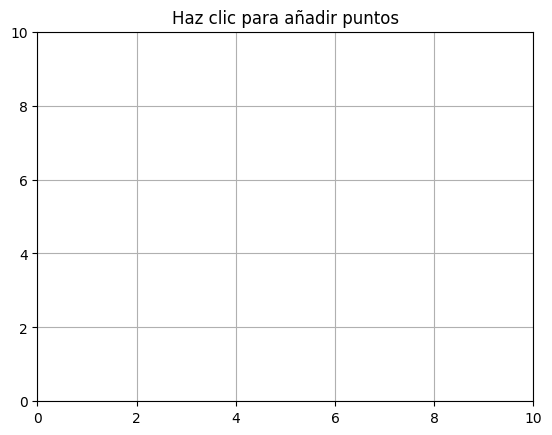

In [2]:
import matplotlib.pyplot as plt

# Lista para almacenar los puntos
points = []

# Función que se ejecuta cuando se hace clic en la gráfica
def onclick(event):
    # Guardar las coordenadas del clic
    ix, iy = event.xdata, event.ydata
    points.append((ix, iy))
    
    # Limpiar la gráfica actual
    plt.clf()
    
    # Dibujar los puntos
    for point in points:
        plt.plot(point[0], point[1], 'bo')  # Puntos en azul

    # Dibujar las líneas que conectan los puntos
    if len(points) > 1:
        plt.plot(*zip(*points), 'r-')  # Líneas rojas entre puntos

    # Redibujar la gráfica con los puntos y las líneas actualizados
    plt.draw()

# Configurar la gráfica
fig, ax = plt.subplots()
ax.set_title('Haz clic para añadir puntos')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.grid(True)  # Activar la cuadrícula

# Conectar el evento de clic al manejador 'onclick'
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Mostrar la ventana interactiva
plt.show()


In [8]:
import customtkinter as ctk
import subprocess
import threading

def run_command():
    """Función para ejecutar el comando en CMD."""
    command = entry.get()  # Obtiene el comando de la entrada del usuario
    if command:  # Verifica que el comando no esté vacío
        # Ejecuta el comando en CMD
        process = subprocess.Popen(["cmd", "/c", command], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        # Función para leer la salida de manera no bloqueante
        def read_output():
            while True:
                output = process.stdout.readline()
                if output == '' and process.poll() is not None:
                    break
                if output:
                    output_text.insert(ctk.END, output)
                    output_text.see(ctk.END)  # Desplaza el texto hacia abajo

            error = process.stderr.read()
            if error:
                output_text.insert(ctk.END, error)
                output_text.see(ctk.END)

        # Ejecuta la función de lectura en un hilo separado
        threading.Thread(target=read_output).start()

def on_enter(event):
    """Ejecuta el comando al presionar Enter."""
    run_command()

# Configuración de la ventana principal
root = ctk.CTk()
root.geometry("800x500")
root.title("Consola CMD en customtkinter")

# Widget de texto para mostrar la salida del comando
output_text = ctk.CTkTextbox(root, width=750, height=350)
output_text.pack(pady=10)

# Entrada de texto para escribir los comandos
entry = ctk.CTkEntry(root, width=750)
entry.pack(pady=10)
entry.bind('<Return>', on_enter)  # Vincula la tecla Enter para ejecutar comandos

# Botón para ejecutar el comando
run_button = ctk.CTkButton(root, text="Ejecutar Comando", command=run_command)
run_button.pack(pady=5)

root.mainloop()


In [6]:
import customtkinter as ctk
import subprocess

def open_cmd_and_run(command):
    """Abre una ventana de CMD y ejecuta un comando automáticamente."""
    # Utiliza el comando `start` para abrir cmd y ejecutar el comando
    subprocess.Popen(f'start cmd /K "{command}"', shell=True)

def run_wsl_home():
    """Abre CMD, inicia WSL y redirige a la carpeta home de Linux."""
    # Comando para iniciar WSL y redirigir a la carpeta home
    open_cmd_and_run("wsl ~")

# Configuración de la ventana principal
root = ctk.CTk()
root.geometry("400x200")
root.title("Abrir WSL en CMD y redirigir a Home")

# Botón para abrir CMD, iniciar WSL, y redirigir a la carpeta home
wsl_button = ctk.CTkButton(root, text="Iniciar WSL y redirigir a Home", command=run_wsl_home)
wsl_button.pack(pady=20)

root.mainloop()


KeyboardInterrupt: 

In [26]:
import gmsh

gmsh.initialize()

# Crear un nuevo modelo
gmsh.model.add("Tobera")

# Definir los puntos (x, y)
L_inlet = 5
D_throat = 2
D_exit = 5
L_outlet = 15

p1 = gmsh.model.geo.addPoint(0, D_throat/2, 0)
p2 = gmsh.model.geo.addPoint(L_inlet, D_throat/2, 0)
p3 = gmsh.model.geo.addPoint(L_inlet, D_exit/2, 0)
p4 = gmsh.model.geo.addPoint(L_outlet, D_exit/2, 0)
p5 = gmsh.model.geo.addPoint(L_outlet, 0, 0)
p6 = gmsh.model.geo.addPoint(0, 0, 0)

# Conectar puntos con líneas
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p1)

# Crear curva compuesta para la cara
gmsh.model.geo.addCurveLoop([l1, l2, l3, l4, l5, l6], 1)
gmsh.model.geo.addPlaneSurface([1], 1)

gmsh.model.geo.synchronize()

# Refinamiento de malla en diferentes partes de la geometría
gmsh.model.mesh.setTransfiniteCurve(l1, 50)
gmsh.model.mesh.setTransfiniteCurve(l2, 30)
gmsh.model.mesh.setTransfiniteCurve(l3, 50)
gmsh.model.mesh.setTransfiniteCurve(l4, 50)
gmsh.model.mesh.setTransfiniteCurve(l5, 50)
gmsh.model.mesh.setTransfiniteCurve(l6, 50)

# Crear la malla
gmsh.model.mesh.generate(2)

# Guardar el archivo .msh
gmsh.write("tobera.msh")

# Finalizar Gmsh
gmsh.finalize()



In [2]:
import pyqtgraph as pg
from PyQt5.QtWidgets import QApplication, QMainWindow
import numpy as np
import sys

class GaugePlot(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # Configurar la ventana principal
        self.setWindowTitle('Gauge Plot with PyQtGraph')
        self.setGeometry(100, 100, 800, 600)

        # Crear un widget de gráfica
        self.plot_widget = pg.PlotWidget(self)
        self.setCentralWidget(self.plot_widget)

        # Configurar el gráfico del gauge
        self.plot_item = self.plot_widget.plot()

        # Configuración inicial de los valores
        self.instValues = [0.5, 0.5, 0.5, 0.5]
        self.maxValues = [1, 1, 1, 1]

        # Programar las actualizaciones
        self.timer = pg.QtCore.QTimer()
        self.timer.timeout.connect(self.update_gauge_plot)
        self.timer.start(100)  # Actualizar cada 100 ms

    def update_gauge_plot(self):
        """Función de actualización para el gráfico del gauge."""
        # Calcular los valores de los gauges
        x = np.linspace(-1.8, 1.8, 100)
        y = np.sin(x * np.pi * self.instValues[0])  # Ejemplo de actualización dinámica

        # Actualizar la gráfica
        self.plot_item.setData(x, y)  # Reutilizar el objeto de datos

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = GaugePlot()
    window.show()
    sys.exit(app.exec_())


SystemExit: 0

C:\Users\marco\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


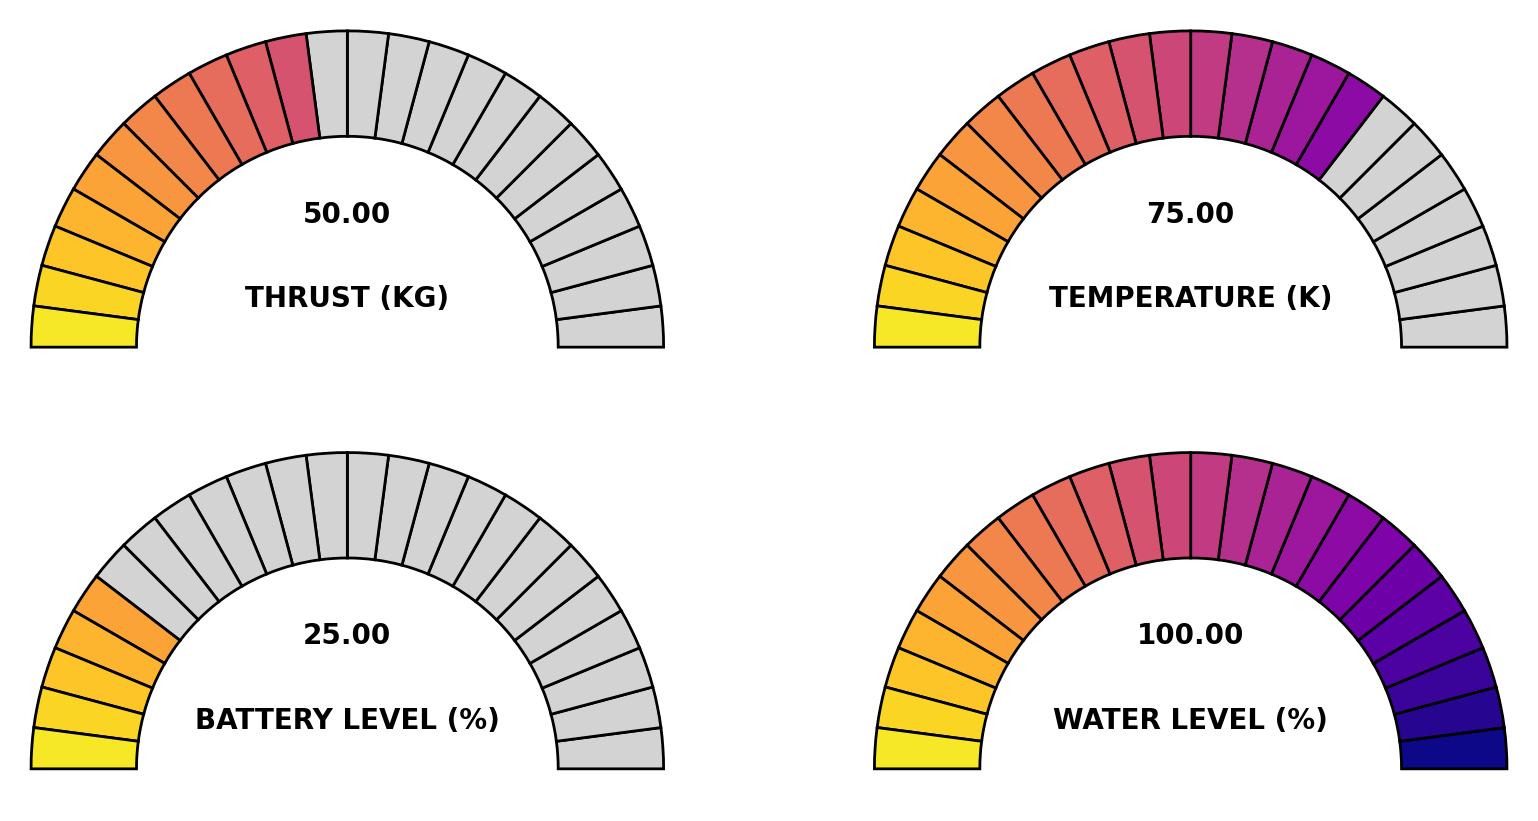

In [131]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def gaugePlot(instValues, maxValues=[0,0,0,0]):
    fig, ax = plt.subplots(figsize=(16, 16))

    # Create a color gradient around the outer circle edge
    n = 25  # Number of segments for the gradient
    cmap = plt.get_cmap('plasma')  # Color map
    delta = 0
    theta = np.linspace(0 - delta, np.pi + delta, n)  # Divide the semicircle into 'n' segments

    x = 1
    y = 0.5
    ri = 0.75
    w = 0.25
    edgCol = 'k'

    instValues = np.array(instValues)
    maxValues = np.array(maxValues)
    percValues = instValues / maxValues

    # Loop over the four positions to plot the gauges
    for j, perc in enumerate(percValues):
        # Determine the number of wedges to fill based on the percentage
        num_fill = int(n * perc)  # Calculate the number of wedges to fill

        # Determine the position offsets for each gauge
        if j == 0:
            x_pos, y_pos = -x, y
        elif j == 1:
            x_pos, y_pos = x, y
        elif j == 2:
            x_pos, y_pos = -x, -y
        else:
            x_pos, y_pos = x, -y

        for i in range(n - 1):
            # Set the color for each wedge
            if num_fill > 0 and i >= (n - num_fill):
                color = cmap(i / (n - 1))  # Fill wedges in reverse order
            else:
                color = 'lightgrey'  # Set the remaining wedges to light grey

            # Create the wedges with the corresponding color
            wedge = patches.Wedge(center=(x_pos, y_pos), r=ri, theta1=np.degrees(theta[i]),
                                  theta2=np.degrees(theta[i + 1]), width=w, facecolor=color, edgecolor=edgCol, linewidth=2)
            ax.add_patch(wedge)



        ## Add text inside the rectangles for the current value
        #ax.text(x_pos, y_pos + (1.15 * ri if y_pos > 0 else -1.25 * ri),
        #        f"{instValues[j]:.2f}", ha='center', va='center', fontsize=20, fontweight='bold')
        
        # Add the shapes to the plot
  

    # Add text to the rectangles
    ax.text(-x, 1.6 * y + 0.02 * ri    , f"{instValues[0]:.2f}", ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(x, 1.6 * y + 0.02 * ri     , f"{instValues[1]:.2f}", ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(-x, 0.4 * -y + 0.02 * ri   , f"{instValues[2]:.2f}", ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(x, 0.4 * -y + 0.02 * ri    , f"{instValues[3]:.2f}", ha='center', va='center', fontsize=20, fontweight='bold')

    ax.text(-x, 1.6 * y + 0.02 * ri    - 0.2, "THRUST (KG)"       , ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(x, 1.6 * y + 0.02 * ri     - 0.2, "TEMPERATURE (K)"   , ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(-x, 0.4 * -y + 0.02 * ri   - 0.2, "BATTERY LEVEL (%)" , ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(x, 0.4 * -y + 0.02 * ri    - 0.2, "WATER LEVEL (%)"   , ha='center', va='center', fontsize=20, fontweight='bold')

    # Fix the percentage to the range [0, 1] so it does not exceed the maximum angle

    # Adjust axis scales so the circle does not get deformed
    ax.set_aspect('equal', 'box')

    # Set axis limits
    ax.set_xlim(-1.8, 1.8)
    ax.set_ylim(-0.6, 1.3)
    fig.tight_layout()
    ax.set_axis_off()

    return fig

# Example usage
percent = [50, 75, 25, 100]

gaugePlot(percent, maxValues=[100,100,100,100])  # Example with percentage greater than 100%
plt.show()


In [70]:
import numpy as np

class TempSchemes:
    
    @staticmethod
    def Euler(f, u, h):
        k1 = np.array([fi(u) for fi in f])
        return u + h * k1
    
    @staticmethod
    def Heun(f, u, h):
        k1 = np.array([fi(u) for fi in f])
        k2 = np.array([fi(u + k1 * h) for fi in f])
        return u + h * (k1 + k2) / 2
    
    @staticmethod
    def RK4(f, u, h):
        k1 = np.array([fi(u) for fi in f])
        k2 = np.array([fi(u + 0.5 * k1 * h) for fi in f])
        k3 = np.array([fi(u + 0.5 * k2 * h) for fi in f])
        k4 = np.array([fi(u + k3 * h) for fi in f])
        return u + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

def solve_ode_system(f_system, u0, h, method, t_max, divergence_threshold=1e6, stop_conditions=None, indefinite=False):
    """
    General solver for a system of differential equations.
    
    Parameters:
    - f_system: list of functions defining the system of ODEs.
    - u0: initial conditions as a list or numpy array.
    - h: step size.
    - method: string, "Euler", "Heun", or "RK4".
    - t_max: maximum time for the simulation.
    - divergence_threshold: optional float, threshold for divergence detection.
    - stop_conditions: optional list of functions, each taking the current state as input and returning a boolean.
    - indefinite: boolean, if True the simulation will run indefinitely until a stop condition is met.
    
    Returns:
    - sol: numpy array with the solution for each variable over time.
    - t: numpy array with the time points.
    """
    schemes = {
        "Euler": TempSchemes.Euler,
        "Heun": TempSchemes.Heun,
        "RK4": TempSchemes.RK4
    }
    
    if method not in schemes:
        raise ValueError("Method should be 'Euler', 'Heun', or 'RK4'")
    
    num_steps = int(t_max / h) + 1 if t_max else 1000  # Initial allocation, will expand if indefinite is True
    sol = np.zeros((num_steps, len(u0)))
    sol[0] = u0
    t = np.zeros(num_steps)
    
    i = 1
    while True:
        if not indefinite and i >= num_steps:
            break
        
        if indefinite and i >= num_steps:
            # Expand arrays if running indefinitely
            sol = np.vstack([sol, np.zeros((1000, len(u0)))])
            t = np.hstack([t, np.zeros(1000)])
            num_steps += 1000

        sol[i] = schemes[method](f_system, sol[i-1], h)
        t[i] = t[i-1] + h
        print(t[i], sol[i][0], sol[i][1])
        
        # Check for divergence
        if np.any(np.abs(sol[i] - sol[i-1]) > divergence_threshold):
            print("Simulation stopped due to divergence.")
            break
        
        # Check for custom stop conditions
        if stop_conditions:
            if any(condition(sol[i]) for condition in stop_conditions):
                print("Simulation stopped due to custom stop condition.")
                break
        
        i += 1
    
    # Trim the arrays to the actual size
    sol = sol[:i]
    t = t[:i]
    
    return sol, t


In [ ]:

# Example of usage:
# Define a system of ODEs, e.g., a simple harmonic oscillator
def f1(u):
    return u[1]

def f2(u):
    k = 1.0  # Spring constant
    m = 1.0  # Mass
    return -k/m * u[0]

# Custom stop conditions example: stop if position exceeds 2 units or velocity exceeds 5 units
def stop_condition_position(state):
    return abs(state[0]) > 2

def stop_condition_velocity(state):
    return abs(state[1]) > 5

# Initial conditions: [position, velocity]
u0 = [1.0, 0.0]
h = 0.01
t_max = 10.0

# Solve the system using RK4 method with indefinite run
f_system = [f1, f2]
stop_conditions = [stop_condition_position, stop_condition_velocity]

sol, t = solve_ode_system(f_system, u0, h, "RK4", t_max, stop_conditions=stop_conditions, indefinite=False)

plt.plot(t, sol[:, 0])

In [119]:

inputs = [0.01, 0.025, 0.005, 0.1, 1400, 0.01356, 0.3, 1.15, 223, 1800, 0, 1e8, 1000, 0.01, 101325]

def discreteIntegration(fs, xs):
    return sum([(xs[i+1] - xs[i]) * (fs[i+1] + fs[i]) / 2 for i in range(len(fs)-1)])

class TempSchemes:
    
    @staticmethod
    def Euler(f, u, h):
        k1 = np.array([fi(u) for fi in f])
        return u + h * k1
    
    @staticmethod
    def Heun(f, u, h):
        k1 = np.array([fi(u) for fi in f])
        k2 = np.array([fi(u + k1 * h) for fi in f])
        return u + h * (k1 + k2) / 2
    
    @staticmethod
    def RK4(f, u, h):
        k1 = np.array([fi(u) for fi in f])
        k2 = np.array([fi(u + 0.5 * k1 * h) for fi in f])
        k3 = np.array([fi(u + 0.5 * k2 * h) for fi in f])
        k4 = np.array([fi(u + k3 * h) for fi in f])
        return u + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

def numerical_derivative(x, f):
    """
    Computes the numerical derivative of a function given by arrays of x and f values.
    
    Parameters:
    - x: array of x values (independent variable).
    - f: array of f values (dependent variable).
    
    Returns:
    - df_dx: array of the numerical derivative df/dx.
    """
    if len(x) != len(f):
        raise ValueError("The length of x and f must be the same")
    
    df_dx = np.zeros_like(f)
    
    # Central difference for the interior points
    df_dx[1:-1] = (f[2:] - f[:-2]) / (x[2:] - x[:-2])
    
    # Forward difference for the first point
    df_dx[0] = (f[1] - f[0]) / (x[1] - x[0])
    
    # Backward difference for the last point
    df_dx[-1] = (f[-1] - f[-2]) / (x[-1] - x[-2])
    
    return df_dx

def solve_ode_system(f_system, u0, h, method, t_max, divergence_threshold=1e6, stop_conditions=None, indefinite=False):
    """
    General solver for a system of differential equations.
    
    Parameters:
    - f_system: list of functions defining the system of ODEs.
    - u0: initial conditions as a list or numpy array.
    - h: step size.
    - method: string, "Euler", "Heun", or "RK4".
    - t_max: maximum time for the simulation.
    - divergence_threshold: optional float, threshold for divergence detection.
    - stop_conditions: optional list of functions, each taking the current state as input and returning a boolean.
    - indefinite: boolean, if True the simulation will run indefinitely until a stop condition is met.
    
    Returns:
    - sol: numpy array with the solution for each variable over time.
    - t: numpy array with the time points.
    """
    schemes = {
        "Euler": TempSchemes.Euler,
        "Heun": TempSchemes.Heun,
        "RK4": TempSchemes.RK4
    }
    
    if method not in schemes:
        raise ValueError("Method should be 'Euler', 'Heun', or 'RK4'")
    
    num_steps = int(t_max / h) + 1 if t_max else 1000  # Initial allocation, will expand if indefinite is True
    sol = np.zeros((num_steps, len(u0)))
    sol[0] = u0
    t = np.zeros(num_steps)
    
    i = 1
    while True:
        if not indefinite and i >= num_steps:
            break
        
        if indefinite and i >= num_steps:
            # Expand arrays if running indefinitely
            sol = np.vstack([sol, np.zeros((1000, len(u0)))])
            t = np.hstack([t, np.zeros(1000)])
            num_steps += 1000

        sol[i] = schemes[method](f_system, sol[i-1], h)
        t[i] = t[i-1] + h
        
        # Check for divergence
        if np.any(np.abs(sol[i] - sol[i-1]) > divergence_threshold):
            print("Simulation stopped due to divergence.")
            break
        
        # Check for custom stop conditions
        if stop_conditions:
            if any(condition(sol[i]) for condition in stop_conditions):
                print("Simulation stopped due to custom stop condition.")
                messagebox.showinfo("Guardar archivo", "Simulation stopped due to custom stop condition.")
                break
        
        i += 1
    
    # Trim the arrays to the actual size
    sol = sol[:i]
    t = t[:i]
    
    return sol, t

class TubularGrain:
    def __init__(self, inputs):
        # Lista de atributos que quieres asignar
        attributes = [
            "rIn_0b", "rOut", "rThrt", "lComb", 
            "rho_b", "a", "n", "gamma", "R", "T1", "P1_min","P1_max", "cChar",
            "delta_r", "P0"
        ]
        
        for attr, value in zip(attributes, inputs):
            setattr(self, attr, value)

        self.sol, self.t = self.combTime()
        self.P = self.sol[:, 0]
        self.r = self.sol[:, 1]

        self.rDot = numerical_derivative(self.t, self.r)
        self.G = self.rho_b * self.Ab(self.r) * self.rDot
        self.M = self.lComb * np.pi * (self.rOut**2 - self.r**2) * self.rho_b

        self.meanPressure, self.meanMassFlow = self.mean_values()

        self.Pmin, self.Pmax = np.min(self.P), np.max(self.P)
        self.Gmin, self.Gmax = np.min(self.G), np.max(self.G)
        self.combustion_time = float(self.t[-1])
        self.combustion_mass = float(self.M[0])
        
    def Ab(self, r):
        return 2 * np.pi * r * self.lComb
        
    def Vc(self, r):
        return np.pi * r**2 * self.lComb

    def combTime(self):

    
        def P_dot(u):
            P, r = u
            term_0 = self.R * self.T1
            term_1 = (self.rho_b * self.a * P**self.n * 1e-2 * self.Ab(r)/self.Vc(r)) 
            term_2 = (P * np.pi * self.rThrt**2) / (self.cChar * self.Vc(r))
            return term_0 * (term_1 - term_2)

        def r_dot(u):
            P, r = u
            return self.a * P**self.n * 1e-2
        
        
        # Initial conditions: [position, velocity]
        u0 = [self.P0, self.rIn_0b]
        h = 0.001
        t_max = 10.0

        # Solve the system using RK4 method with indefinite run
        f_system = [P_dot, r_dot]

        def rMax_condition(state):
            P, r = state
            return r >= self.rOut
        
        def maxPressureLimit(state):
            P, r = state
            return P > self.P1_max
        
        def minPressureLimit(state):
            P, r = state
            return P < self.P1_min
        
        stop_conditions = [rMax_condition]#, maxPressureLimit, minPressureLimit]
        sol, t = solve_ode_system(f_system, u0, h, "RK4", t_max, stop_conditions=stop_conditions, indefinite=True)
        
        return sol, t
        
    
    def mean_values(self):
        interval = self.t[-1] - self.t[0]
        mean_pressure = float(discreteIntegration(self.P, self.t) / interval)
        mean_massflow = float(discreteIntegration(self.G, self.t) / interval)
        return mean_pressure, mean_massflow
    
    def pressureGraph(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(self.t, self.P, label='Pressure',linewidth=2)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pressure (Pa)')
        ax.set_title('Pressure vs Time')
        ax.grid(True)
        return fig

    def massFlowGraph(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(self.t, self.G, label='Mass Flow Rate',linewidth=2)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Mass Flow Rate (kg/s)')
        ax.set_title('Mass Flow Rate vs Time')
        ax.grid(True)
        return fig

    def massTimeGraph(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(self.t, self.M, label='Mass',linewidth=2)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Mass (kg)')
        ax.set_title('Mass vs Time')
        ax.grid(True)
        return fig


test = TubularGrain(inputs)
test.meanPressure

Simulation stopped due to custom stop condition.


2040927.2012541154